In [28]:
# Projet issu des données suivantes :

# https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [29]:
# Importation des library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Import des données

df_train = pd.read_csv('train.csv', sep = ',')
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [31]:
# Obtenir les noms des variables
noms_variables = df_train.columns

# Afficher les noms des variables
print(noms_variables)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


On décide de modifier le nom de nos variables ainsi que des modalités de la variable à expliquer

In [32]:
# modification des noms des variables

df_train.rename(columns={'battery_power': 'puissance_batterie', 
                         'blue': 'Bluetooth', 
                         'clock_speed': 'vitesse_micro_pross', 
                         'fc': 'nb_pixels_camera_front', 
                         'four_g': '4G', 
                         'int_memory': 'mémoire_interne',
                         'm_dep': 'profondeur_tel',
                         'mobile_wt': 'poids_tel',
                         'n_cores': 'nb_coeurs',
                         'pc': 'nb_pixels_camera_externe',
                         'px_height': 'pixels_resolution_hauteur',
                         'px_width': 'pixels_resolution_largeur',
                         'sc_h': 'hauteur_tel',
                         'sc_w': 'largeur_tel',
                         'talk_time': 'duree_batterie_appel',
                         'three_g': '3G',
                         'touch_screen': 'ecran_tactile'})

,puissance_batterie,Bluetooth,vitesse_micro_pross,dual_sim,nb_pixels_camera_front,4G,mémoire_interne,profondeur_tel,poids_tel,nb_coeurs,...,pixels_resolution_hauteur,pixels_resolution_largeur,ram,hauteur_tel,largeur_tel,duree_batterie_appel,3G,ecran_tactile,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [33]:
# Remplacer les modalités dans la colonne
nouveaux_noms_modalites = {0: 'bas de gamme', 1: 'prix moyen', 2: 'prix élevé', 3: 'haut de gamme'}
df_train['price_range'] = df_train['price_range'].replace(nouveaux_noms_modalites)

# Afficher les modalités de la colonne
modalites = df_train['price_range'].unique()

# Afficher les modalités
print("Modalités de la price_range :", modalites)

Modalités de la price_range : ['prix moyen' 'prix élevé' 'haut de gamme' 'bas de gamme']


In [34]:
# On sépare la variable à expliquer des variables explicatives
X = df_train.drop("price_range",axis=1)
y = df_train['price_range']

In [35]:
# Nous allons utiliser cette livrary pour split nos échantillons
from sklearn.model_selection import train_test_split

In [36]:
# On split le train et le test à 80 % et 20 %
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0, stratify=y)

In [37]:
# Import de la library pour utiliser le scaler
from sklearn.preprocessing import StandardScaler

In [38]:
# On prévoit d'utiliser le scaler pour centrer et réduire les variables quantitatives
scaler = StandardScaler()

In [39]:
# On applique le scaler à nos échantillons
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Importation de la library pour la regression logistique
from sklearn.linear_model import LogisticRegression

In [41]:
# Application de la regression logistique sur notre échantillon d'apprentissage
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
# Importation des library pour la pipeline
from sklearn.pipeline import make_pipeline

# Création de la pipeline
pLg = make_pipeline(StandardScaler(),
                    LogisticRegression(max_iter=1000,C=0.1)) #c = force de régularisation, a mettre dans un gridcv
pLg.fit(X_train, y_train)
print(pLg.score(X_train, y_train), pLg.score(X_test, y_test))

0.95 0.935


In [43]:
# Import package pour création matrice de confusion
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [44]:
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Convertir la matrice de confusion en pourcentage
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

print("-------------------------------------------------------------------------")
print(f"The accuracy score is: ------>>  {accuracy_score(y_test, y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix (Percentage with Totals) is: ------>> \n{conf_matrix_percent}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> {classification_report(y_test, y_pred)}")

-------------------------------------------------------------------------
The accuracy score is: ------>>  0.9725
-------------------------------------------------------------------------
The Confusion Matrix (Percentage with Totals) is: ------>> 
[[97.  0.  3.  0.]
 [ 0. 99.  0.  1.]
 [ 2.  0. 95.  3.]
 [ 0.  0.  2. 98.]]
-------------------------------------------------------------------------
The Classification Report is: ---->>                precision    recall  f1-score   support

 bas de gamme       0.98      0.97      0.97       100
haut de gamme       1.00      0.99      0.99       100
   prix moyen       0.95      0.95      0.95       100
   prix élevé       0.96      0.98      0.97       100

     accuracy                           0.97       400
    macro avg       0.97      0.97      0.97       400
 weighted avg       0.97      0.97      0.97       400



In [45]:
# Import des library pour créer la courbe de ROC & calcul de l'AUC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

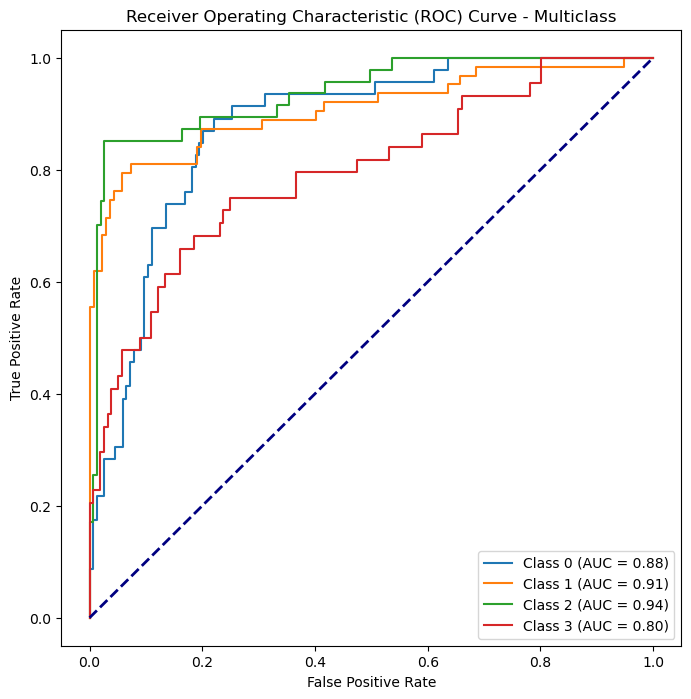

In [53]:
# Création de la courbe de ROC

# Générer des données de démonstration
X, y = make_classification(n_samples=1000, n_classes=4, n_clusters_per_class=1, random_state=42)

# Binariser les étiquettes
y_bin = label_binarize(y, classes=[0, 1, 2, 3])

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Utiliser OneVsRestClassifier avec un classificateur binaire (par exemple, Logistic Regression)
classifier = OneVsRestClassifier(LogisticRegression())

# Ajuster le modèle
classifier.fit(X_train, y_train)

# Obtenir les scores des probabilités
y_score = classifier.predict_proba(X_test)

# Calculer les courbes ROC et les aires sous la courbe pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):  # 4 classes dans cet exemple
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer les courbes ROC
plt.figure(figsize=(8, 8))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.show()

In [58]:
# Générer des données de démonstration
X, y = make_classification(n_samples=1000, n_classes=4, n_clusters_per_class=1, random_state=42)

# Convertir les données en DataFrame Pandas avec des noms de colonnes
columns = [f'Feature_{i}' for i in range(X.shape[1])]
X_df = pd.DataFrame(X, columns=columns)

# Diviser les données en ensemble d'entraînement et ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Spécifier la classe pour laquelle vous souhaitez obtenir les coefficients (par exemple, classe 0)
classe_specifique = 3

# Créer et ajuster le modèle de régression logistique pour la classe spécifique
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, (y_train == classe_specifique).astype(int))

# Configurer l'affichage pour afficher tous les chiffres après la virgule
np.set_printoptions(precision=8, suppress=True)

# Obtenir les coefficients avec les noms des variables
coefficients = model.coef_

# Afficher les coefficients avec les noms des variables
print(f'Coefficients pour la classe {classe_specifique}:')
for j, coef in enumerate(coefficients[0]):
    print(f'{X_train.columns[j]}: {coef}')

Coefficients pour la classe 3:
Feature_0: 0.04661801030092146
Feature_1: -0.2547689362794098
Feature_2: 0.050847795140044665
Feature_3: 0.042661020828245154
Feature_4: 0.033057196767139634
Feature_5: 0.2594706198863933
Feature_6: 0.008753316882283197
Feature_7: 0.0155116137045031
Feature_8: -0.024185761404102484
Feature_9: 0.11247835008882513
Feature_10: 0.04765727407396775
Feature_11: 0.0475915924042301
Feature_12: 0.08711314549534026
Feature_13: -0.003122039361369805
Feature_14: 0.34469122179281264
Feature_15: 0.018056923047194726
Feature_16: 0.035974774581776274
Feature_17: 0.015203208842459815
Feature_18: -0.20583426493209112
Feature_19: 0.022294357167889002
